# Project 1

## Import needed package

In [3]:
%matplotlib inline
import matplotlib as mlb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpathes
from matplotlib.pyplot import MultipleLocator


## Read data

In [4]:
# data
data = pd.read_csv('/Users/hurryzhao/Downloads/android_test_inspector-master/results_merged.csv')
data = [data.stars.dropna().tolist(),data.contributors.dropna().tolist(),data.commits.dropna().tolist()]
print(data)

[[354, 12, 54, 146, 28, 28, 28, 28, 6, 63, 788, 20, 15, 40, 40, 2535, 61, 28, 17, 12, 5, 82, 1, 15, 388, 320, 9, 27, 27, 22, 47, 1526, 19, 681, 45, 27, 5, 53, 1, 60, 209, 44, 24, 38, 265, 29, 6, 8, 22, 11, 11, 6, 0, 24, 211, 14, 3, 215, 57, 744, 39, 106, 39, 60, 22, 103, 19, 428, 15, 1187, 5, 21, 6, 6, 35, 352, 29, 42, 2, 423, 882, 69, 60, 4, 20, 12, 130, 19, 35, 630, 87, 741, 3, 4, 79, 7, 56, 1, 47, 268, 4, 393, 44, 1389, 745, 23, 16, 45, 473, 8, 58, 2, 43, 262, 191, 4, 26, 9, 16, 241, 7, 12, 11, 534, 5, 143, 912, 912, 37, 45, 18, 263, 50, 60, 26, 9, 256, 7, 34, 13, 37, 473, 15, 436, 753, 12, 51, 28, 12, 1277, 4, 50, 10, 11, 2, 1, 339, 1, 67, 857, 4, 4, 2, 29, 3, 1624, 4, 1416, 1736, 369, 3, 33, 30, 18, 22, 3277, 414, 310, 182, 8, 11, 376, 806, 1352, 36, 10, 18, 54, 1, 68, 36, 4, 7, 67, 271, 87, 181, 50, 33, 3, 581, 9, 10, 5, 33, 32, 0, 40, 238, 2, 174, 926, 18, 22, 93, 1382, 186, 91, 18, 7, 76, 23, 8, 8, 8, 30, 42, 9, 3, 324, 127, 261, 4, 9, 1, 2, 13, 104, 3, 98, 108, 5, 24, 4, 6, 9,

## Generate boxplot

In [41]:
def boxplot(ax, 
            Data, 
            outlier=True,
            box_facecolor='white', 
            box_edgecolor='k', 
            outlier_facecolor='r', 
            outlier_edgecolor='r',
            whisker_edgecolor='k',
            median_edgecolor='k',
            box_alpha=1.0,
            outlier_alpha=1.0):
    h=max(max(p) for p in Data) + 0.1*abs(max(max(p) for p in Data))
    l=min(min(p) for p in Data) + 0.1*abs(min(min(p) for p in Data))
    count = len(Data)
    a=(h-l)/2000
    if outlier==True:
        center = [round(((h-l)/(count+1))*(x+1),8) for x in range(count)]
    else:
        center = [round(((h-l)/(count+1))*(x+1),8)/a for x in range(count)]
    ax.axis('equal')
    i=0
    for data in Data:
        data = sorted(data)
        # percentile
        p = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
        pen = [round((len(data)+1)*x,2) for x in p]
        d = [np.quantile(data,j) for j in p]
        
        # outlier
        IQR = d[-1]-d[0]
        upper = d[-1] + 1.5*IQR
        lower = d[0] - 1.5*IQR
        Upper = min(upper,data[-1])
        Lower = max(lower,data[0])
        outliers = []
        for p in data:
            if p > upper or p < lower:
                outliers.append(p)
        if outlier==True:
            for p in outliers:
                rect = mpathes.Ellipse((center[i],p),0.04*center[-1],0.04*center[-1],
                                       ec=outlier_edgecolor,fc=outlier_facecolor,alpha=outlier_alpha)  
                ax.add_patch(rect)

        # whisker
        ax.hlines(Upper,center[i]-0.1*center[0],center[i]+0.1*center[0],whisker_edgecolor)
        ax.hlines(Lower,center[i]-0.1*center[0],center[i]+0.1*center[0],whisker_edgecolor)
        ax.vlines(center[i],Lower,d[0],whisker_edgecolor)
        ax.vlines(center[i],d[-1],Upper,whisker_edgecolor)

        # median
        ax.hlines(d[5],center[i]-0.2*center[0],center[i]+0.2*center[0],median_edgecolor,lw=3)
        
        # box
        rect = mpathes.Rectangle((center[i]-0.2*center[0],d[0]),0.4*center[0],d[-1]-d[0],
                                 ec=box_edgecolor,fc=box_facecolor,alpha = box_alpha)
        ax.add_patch(rect)
        i+=1
    plt.show()


[500.0, 1000.0, 1499.9999999999998]


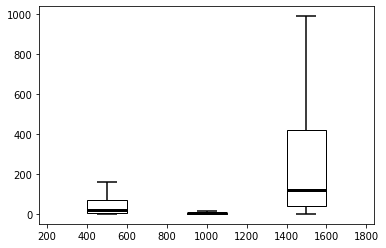

In [42]:
# boxplot
fig,ax = plt.subplots()
boxplot(ax,data,outlier_facecolor='w', outlier_edgecolor='k',outlier=False)

## Generate info_boxplot

In [60]:
def info_boxplot(ax, 
                 Data, 
                 multiplebox=True, 
                 outlier=True,
                 box_facecolor='white', 
                 box_edgecolor='k', 
                 outlier_facecolor='r', 
                 outlier_edgecolor='r',
                 whisker_edgecolor='k',
                 median_edgecolor='k',
                 box_alpha = 1.0,
                 outlier_alpha = 1.0):
    h=max(max(p) for p in Data) + 0.1*abs(max(max(p) for p in Data))
    l=min(min(p) for p in Data) + 0.1*abs(min(min(p) for p in Data))
    count = len(Data)
    a=(h-l)/2000
    if outlier==True:
        center = [round(((h-l)/(count+1))*(x+1),8) for x in range(count)]
    else:
        center = [round(((h-l)/(count+1))*(x+1),8)/a for x in range(count)]
    print(center)
    ax.axis('equal')
    i=0
    for data in Data:
        # percentile
        p = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
        pen = [round((len(data)+1)*x,8) for x in p]
        data = sorted(data)
        d = [np.quantile(data,i) for i in p]
        
        # outlier
        IQR = d[-1]-d[0]
        upper = d[-1] + 1.5*IQR
        lower = d[0] - 1.5*IQR
        Upper = min(upper,data[-1])
        Lower = max(lower,data[0])
        if outlier==True:
            for p in outliers:
                rect = mpathes.Ellipse((center[i],p),0.04*center[-1],0.04*center[-1],
                                       ec=outlier_edgecolor,fc=outlier_facecolor,alpha=outlier_alpha)  
                ax.add_patch(rect)
            
        # whisker
        ax.hlines(Upper,center[i]-0.1*center[0],center[i]+0.1*center[0],whisker_edgecolor)
        ax.hlines(Lower,center[i]-0.1*center[0],center[i]+0.1*center[0],whisker_edgecolor)
        ax.vlines(center[i],Lower,d[0],whisker_edgecolor)
        ax.vlines(center[i],d[-1],Upper,whisker_edgecolor)

        
        # median
        ax.hlines(d[5],center[i]-0.2*center[0],center[i]+0.2*center[0],median_edgecolor,lw=3)
        
        # multiplebox
        if multiplebox==True:
            for x in d:
                ax.hlines(d,center[i]-0.2*center[0],center[i]+0.2*center[0],box_edgecolor,lw=1)
                
        # box
        rect = mpathes.Rectangle((center[i]-0.2*center[0],d[0]),0.4*center[0],d[-1]-d[0],
                                 ec=box_edgecolor,fc=box_facecolor,alpha = box_alpha)
        ax.add_patch(rect)
        i+=1
    plt.show()

[500.0, 1000.0, 1499.9999999999998]


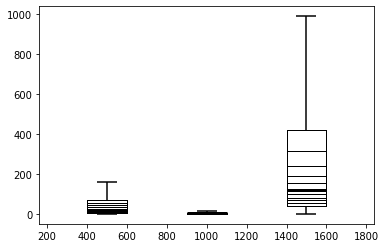

<Figure size 1152x1152 with 0 Axes>

In [61]:
# info_boxplot
fig,ax = plt.subplots()
plt.figure(figsize=(16,16))
info_boxplot(ax,data,outlier=False,multiplebox=True)

## Generate hist_boxplot

In [62]:
def hist_boxplot(ax, 
                 Data, 
                 n_bins=10,
                 outlier=True,
                 box_facecolor='white', 
                 box_edgecolor='k', 
                 outlier_facecolor='r', 
                 outlier_edgecolor='r',
                 whisker_edgecolor='k',
                 median_edgecolor='k',
                 bin_facecolor='#CECECE',
                 bin_edgecolor='k',
                 box_alpha = 1.0,
                 outlier_alpha = 1.0,
                 hist_alpha=1.0):
    i=0
    h=max(max(p) for p in Data) + 0.1*abs(max(max(p) for p in Data))
    l=min(min(p) for p in Data) + 0.1*abs(min(min(p) for p in Data))
    count = len(Data)
    a=(h-l)/2000
    if outlier==True:
        center = [round(((h-l)/(count+1))*(x+1),8) for x in range(count)]
    else:
        center = [round(((h-l)/(count+1))*(x+1),8)/a for x in range(count)]    
    print(center)
    ax.axis('equal')
    for data in Data:
        # percentile
        p = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
        pen = [round((len(data)+1)*x,8) for x in p]
        data = sorted(data)
        d = [np.quantile(data,i) for i in p]
        
        # outlier
        IQR = d[-1]-d[0]
        upper = d[-1] + 1.5*IQR
        lower = d[0] - 1.5*IQR
        Upper = min(upper,data[-1])
        Lower = max(lower,data[0])
        outliers = []
        for p in data:
            if p > upper or p < lower:
                outliers.append(p)
        if outlier==True:
            w = (data[-1]-data[0])/n_bins
            for p in outliers:
                rect = mpathes.Ellipse((center[i],p),0.04*center[-1],0.04*center[-1],
                                       ec=outlier_edgecolor,fc=outlier_facecolor,alpha=outlier_alpha)  
                ax.add_patch(rect) 
        else:
            w=(Upper-Lower)/n_bins
        # hist
        bins = [w*i for i in range(n_bins+1)]
        Bin = []
        for k in range(n_bins):
            s=0
            for j in data:
                if j >= bins[k] and j < bins[k+1]:
                    s+=1
            Bin.append(s)
        for c in range(len(Bin)):
            rect = mpathes.Rectangle((center[i],bins[c]+Lower),Bin[c]/5,w,
                                     ec=bin_edgecolor,fc=bin_facecolor,alpha=hist_alpha)
            ax.add_patch(rect)
            
        # whisker
        ax.hlines(Upper,center[i]-0.1*center[0],center[i],whisker_edgecolor)
        ax.hlines(Lower,center[i]-0.1*center[0],center[i],whisker_edgecolor)
        ax.vlines(center[i],Lower,d[0],whisker_edgecolor)
        ax.vlines(center[i],d[-1],Upper,whisker_edgecolor)
        
        # median
        ax.hlines(d[5],center[i]-0.2*center[0],center[i],median_edgecolor,lw=3)
        
        # box
        rect = mpathes.Rectangle((center[i]-0.2*center[0],d[0]),0.2*center[0],d[-1]-d[0],
                                 ec=box_edgecolor,fc=box_facecolor,alpha=box_alpha)
        ax.add_patch(rect)
        i+=1
    plt.show()

[500.0, 1000.0, 1499.9999999999998]


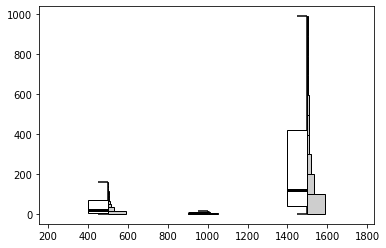

In [64]:
# hist_boxplot
fig,ax = plt.subplots()
hist_boxplot(ax,data,outlier=False)

## Generate creative_boxplot

In [57]:
import random
def creative_boxplot(ax, 
                    Data, 
                    outlier=True,
                    box_facecolor='white', 
                    box_edgecolor='k', 
                    outlier_facecolor='b', 
                    outlier_edgecolor=None,
                    whisker_edgecolor='k',
                    median_edgecolor='k',
                    box_alpha = 1.0,
                    outlier_alpha = 1.0,
                    point_alpha=0.3):
    h=max(max(p) for p in Data) + 0.1*abs(max(max(p) for p in Data))
    l=min(min(p) for p in Data) + 0.1*abs(min(min(p) for p in Data))
    count = len(Data)
    a=(h-l)/2000
    if outlier==True:
        center = [round(((h-l)/(count+1))*(x+1),8) for x in range(count)]
        lw_l = 0.0001*center[0]
    else:
        center = [round(((h-l)/(count+1))*(x+1),8)/a for x in range(count)]  
        lw_l = 0.005*center[0]
    print(center)
    ax.axis('equal')
    i=0
    point=[]
    for data in Data:
        data = sorted(data)
        # percentile
        p = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
        pen = [round((len(data)+1)*x,2) for x in p]
        d = [np.quantile(data,j) for j in p]
        
        # outlier
        IQR = d[-1]-d[0]
        upper = d[-1] + 1.5*IQR
        lower = d[0] - 1.5*IQR
        Upper = min(upper,data[-1])
        Lower = max(lower,data[0])
        outliers = []
        for p in data:
            if p > upper or p < lower:
                outliers.append(p)
        if outlier==True:
            for p in outliers:
                rect = mpathes.Ellipse((center[i],p),0.04*center[-1],0.04*center[-1],
                                       ec=outlier_edgecolor,fc=outlier_facecolor,alpha=outlier_alpha) 
                rect.set_alpha(0.7)
                ax.add_patch(rect)
        # box
        rect = mpathes.Rectangle((center[i]-0.2*center[0],d[0]),0.4*center[0],d[-1]-d[0],
                                 ec=box_edgecolor,fc=box_facecolor,alpha=box_alpha)
        ax.add_patch(rect)
        
        # points
        for p in data:
            if p not in outliers:
                x = center[i]-0.05*center[0]+random.uniform(0,0.1*center[0])
                rect = mpathes.Ellipse((x,p),0.01*center[0],0.01*center[0],ec=outlier_edgecolor,fc=outlier_facecolor) 
                rect.set_alpha(point_alpha)
                ax.add_patch(rect)

        # median
        ax.hlines(d[5],center[i]-0.2*center[0],center[i]+0.2*center[0],median_edgecolor,lw=3)
        # line
        point.append([center[i],d[5]])
        i+=1
        
    for i in range(len(point)-1):
        x = point[i][0]
        y = point[i][1]
        arrow = mpathes.FancyArrowPatch((point[i][0], point[i][1]), (point[i+1][0], point[i+1][1]),arrowstyle='-',lw=lw_l,color='g')
        ax.add_patch(arrow)
    plt.show()

[500.0, 1000.0, 1499.9999999999998]


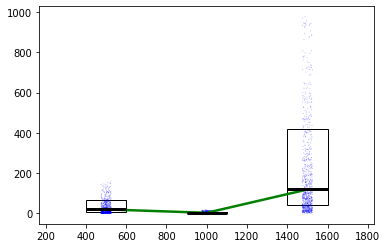

In [59]:
fig,ax = plt.subplots()
creative_boxplot(ax,data,outlier=False)